# Redes Sociais x Ansiedade
## 1º Trabalho bimestral - Ciência de Dados

**Aluno**: Vinicius Casimiro

**RA**: 221026321

---
\\
O trabalho tem como objetivo principal entender a relação entre o uso das redes sociais e a ansiedade gerada a partir disso.
Para que isso fosse possível, um [formulário](https://forms.gle/AJS5TzZEEyWamUQc8) foi divulgado a fim de levantar dados para análise.


## Importando dados



Os dados levantados através do formulário foram exportados como uma planilha (.csv), que aqui será importada, através do [link](https://docs.google.com/spreadsheets/d/16h2iXZCdt5EqlkOLshaex1YAJLgSG9z7_zRmeCXAsvU/edit?usp=sharing) gerado. Ou baixado pelo [link](https://docs.google.com/spreadsheets/d/16h2iXZCdt5EqlkOLshaex1YAJLgSG9z7_zRmeCXAsvU/export?format=csv).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
forms_link = "https://docs.google.com/spreadsheets/d/16h2iXZCdt5EqlkOLshaex1YAJLgSG9z7_zRmeCXAsvU/export?format=csv"

forms_df = pd.read_csv(forms_link)
forms_df.head()

,Carimbo de data/hora,Qual é a sua faixa etária?,Qual é o seu gênero?,Quais redes sociais você mais utiliza? (pode selecionar mais de uma),"Em média, quanto tempo você passa nas redes sociais por dia?",Como você costuma se sentir logo após usar as redes sociais?,Você já sentiu que não consegue ficar longe das redes sociais por muito tempo?,"Em uma escala de 0 a 5, quanto você acredita que as redes sociais influenciam sua ansiedade?",Você já pensou em reduzir o tempo de uso das redes sociais para melhorar seu bem-estar emocional?
0,28/04/2025 10:45:41,18-24,Masculino,Twitter (X),Entre 1 e 3 horas,Sem alteração percebida,Raramente,4,Sim
1,28/04/2025 10:51:54,18-24,Masculino,"Instagram, Whatsapp",Entre 3 e 5 horas,Sem alteração percebida,Às vezes,5,Sim
2,28/04/2025 10:59:49,18-24,Feminino,Youtube,Mais de 5 horas,Sem alteração percebida,Às vezes,1,Não
3,28/04/2025 11:34:58,18-24,Masculino,Whatsapp,Entre 1 e 3 horas,Sem alteração percebida,Raramente,2,Não
4,28/04/2025 11:47:56,18-24,Feminino,"Instagram, TikTok, Twitter (X), Whatsapp",Entre 3 e 5 horas,Mais ansioso(a),Frequentemente,4,Sim


### Quantidade de entradas

In [ ]:
forms_df.shape

(33, 9)

## Filtragem e limpeza dos dados

In [ ]:
forms_df.columns

Index(['Carimbo de data/hora', 'Qual é a sua faixa etária?',
       'Qual é o seu gênero?',
       'Quais redes sociais você mais utiliza? (pode selecionar mais de uma)',
       'Em média, quanto tempo você passa nas redes sociais por dia?',
       'Como você costuma se sentir logo após usar as redes sociais?',
       'Você já sentiu que não consegue ficar longe das redes sociais por muito tempo?',
       'Em uma escala de 0 a 5, quanto você acredita que as redes sociais influenciam sua ansiedade?',
       'Você já pensou em reduzir o tempo de uso das redes sociais para melhorar seu bem-estar emocional?'],
      dtype='object')

---
\\
### Data e hora

A data e hora de preenchimento do formulário não será útil para a pesquisa, dessa forma essa coluna pode ser excluída.

In [ ]:
forms_df = forms_df.drop(columns=["Carimbo de data/hora"])
forms_df.head()

,Qual é a sua faixa etária?,Qual é o seu gênero?,Quais redes sociais você mais utiliza? (pode selecionar mais de uma),"Em média, quanto tempo você passa nas redes sociais por dia?",Como você costuma se sentir logo após usar as redes sociais?,Você já sentiu que não consegue ficar longe das redes sociais por muito tempo?,"Em uma escala de 0 a 5, quanto você acredita que as redes sociais influenciam sua ansiedade?",Você já pensou em reduzir o tempo de uso das redes sociais para melhorar seu bem-estar emocional?
0,18-24,Masculino,Twitter (X),Entre 1 e 3 horas,Sem alteração percebida,Raramente,4,Sim
1,18-24,Masculino,"Instagram, Whatsapp",Entre 3 e 5 horas,Sem alteração percebida,Às vezes,5,Sim
2,18-24,Feminino,Youtube,Mais de 5 horas,Sem alteração percebida,Às vezes,1,Não
3,18-24,Masculino,Whatsapp,Entre 1 e 3 horas,Sem alteração percebida,Raramente,2,Não
4,18-24,Feminino,"Instagram, TikTok, Twitter (X), Whatsapp",Entre 3 e 5 horas,Mais ansioso(a),Frequentemente,4,Sim


### Nome das colunas

De primeira vista, é perceptível que as colunas são tem nomes extensos, então primeiramente, o nome das colunas será alterado para algo mais claro

In [ ]:
forms_df = forms_df.rename(columns={
    'Qual é a sua faixa etária?':"age",
    'Qual é o seu gênero?':"gender",
    'Quais redes sociais você mais utiliza? (pode selecionar mais de uma)':"main_social_networks",
    'Em média, quanto tempo você passa nas redes sociais por dia?':"daily_social_time",
    'Como você costuma se sentir logo após usar as redes sociais?':"feeling_after_use",
    'Você já sentiu que não consegue ficar longe das redes sociais por muito tempo?':"feels_dependent",
    'Em uma escala de 0 a 5, quanto você acredita que as redes sociais influenciam sua ansiedade?':"anxiety_influence",
    'Você já pensou em reduzir o tempo de uso das redes sociais para melhorar seu bem-estar emocional?':"thought_about_reducing"
  })

forms_df.columns

Index(['age', 'gender', 'main_social_networks', 'daily_social_time',
       'feeling_after_use', 'feels_dependent', 'anxiety_influence',
       'thought_about_reducing'],
      dtype='object')

### Dados repetidos, categorizados como diferentes

Em algumas perguntas onde a resposta "outros" era permitida, diferentes formas de escrever a mesma coisa pode separar respostas em categorias diferentes, dessa maneira, essa seção busca, agrupar esses dados iguais em mesmas  categorias.

In [ ]:
forms_df['main_social_networks']

,main_social_networks
0,twitter (x)
1,"instagram, whatsapp"
2,youtube
3,whatsapp
4,"instagram, tiktok, twitter (x), whatsapp"
5,"instagram, whatsapp"
6,"instagram, facebook, twitter (x), whatsapp"
7,twitter (x)
8,instagram
9,"instagram, tiktok, whatsapp"


In [ ]:
forms_df['main_social_networks'] = forms_df['main_social_networks'].str.lower().str.strip()

replace_dict = {
    'youtube shorts': 'youtube'
}

for wrong, correct in replace_dict.items():
    forms_df['main_social_networks'] = forms_df['main_social_networks'].str.replace(wrong, correct)

,main_social_networks
0,twitter (x)
1,"instagram, whatsapp"
2,youtube
3,whatsapp
4,"instagram, tiktok, twitter (x), whatsapp"
5,"instagram, whatsapp"
6,"instagram, facebook, twitter (x), whatsapp"
7,twitter (x)
8,instagram
9,"instagram, tiktok, whatsapp"


## Análise exploratória

Distribuição por faixa etária

In [ ]:
age_distrib = forms_df['age'].value_counts().sort_index()
age_freq = (age_distrib / age_distrib.sum()) * 100
cum_percent = age_freq.cumsum()

age_df_freq = pd.DataFrame({
    'Count': age_distrib,
    'Frequency (%)': age_freq,
    'Cumulative frequency (%):': cum_percent
})

age_df_freq

,Count,Frequency (%),Cumulative frequency (%):
age,,,
18-24,28,84.848485,84.848485
25-34,3,9.090909,93.939394
45-54,2,6.060606,100.000000


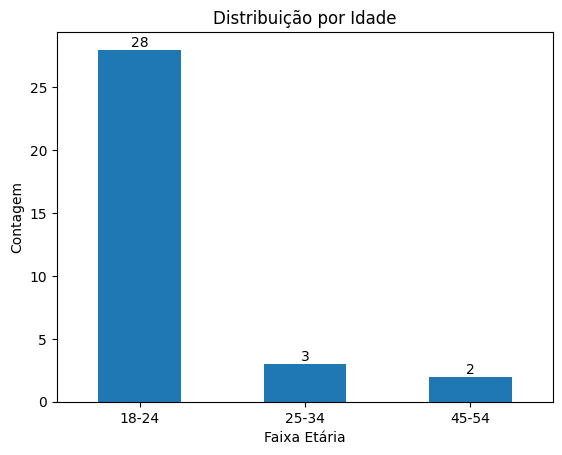

In [ ]:
ax = age_distrib.plot(kind='bar')

plt.title('Distribuição por Idade')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

for i, v in enumerate(age_distrib):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

Distribuição por gênero

In [ ]:
gender_distrib = forms_df['gender'].value_counts().sort_index()
gender_freq = (gender_distrib / gender_distrib.sum()) * 100

cum_percent = gender_freq.cumsum()

gender_df_freq = pd.DataFrame({
    'Count': gender_distrib,
    'Frequency (%)': gender_freq,
    'Cumulative frequency (%):': cum_percent
})

gender_df_freq

,Count,Frequency (%)
gender,,
Feminino,16,48.484848
Masculino,15,45.454545
Prefiro não informar,2,6.060606


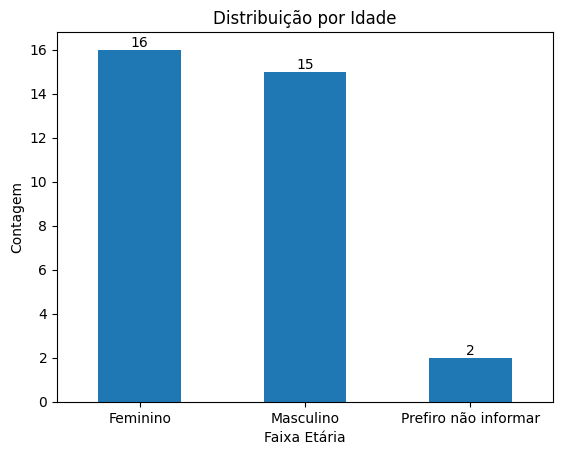

In [ ]:
ax = gender_distrib.plot(kind='bar')

plt.title('Distribuição por Idade')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

for i, v in enumerate(gender_distrib):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [ ]:
mean_time_count = forms_df['daily_social_time'].value_counts().sort_index()
percent = (mean_time_count / mean_time_count.sum()) * 100

cum_percent = percent.cumsum()

mean_time_df_freq = pd.DataFrame({
    'Count': mean_time_count,
    'Frequency (%)': percent,
    'Comulative frequency (%)': cum_percent
})

mean_time_df_freq

,Count,Frequency (%),Comulative frequency (%)
daily_social_time,,,
Entre 1 e 3 horas,13,39.393939,39.393939
Entre 3 e 5 horas,10,30.303030,69.696970
Mais de 5 horas,9,27.272727,96.969697
Menos de 1 hora,1,3.030303,100.000000


Redes sociais mais utilizadas

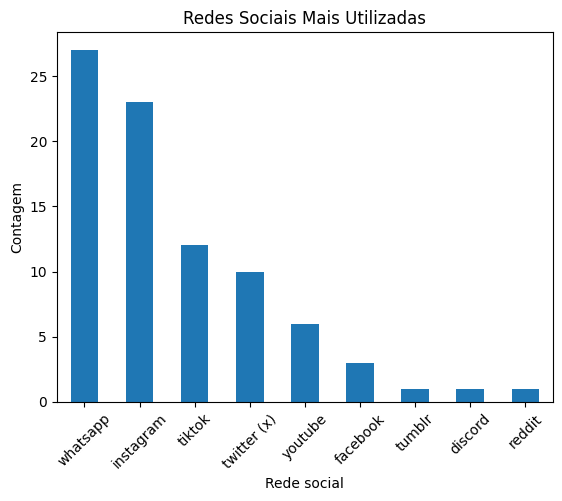

In [ ]:
from collections import Counter

all_responses = forms_df['main_social_networks'].str.split(',').sum()
counts = pd.Series(Counter([resp.strip() for resp in all_responses])).sort_values(ascending=False)

counts.plot(kind='bar')

plt.title('Redes Sociais Mais Utilizadas')
plt.xlabel('Rede social')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

plt.show()

In [ ]:
cross_table_feeling_time = pd.crosstab(forms_df['feeling_after_use'], forms_df['daily_social_time'])

cross_table_feeling_time

daily_social_time,Entre 1 e 3 horas,Entre 3 e 5 horas,Mais de 5 horas,Menos de 1 hora
feeling_after_use,,,,
Mais ansioso(a),9,4,4,0
Menos ansioso(a),1,0,0,0
Sem alteração percebida,3,6,5,1


Relação entre o tempo de uso e como o usuário se sente

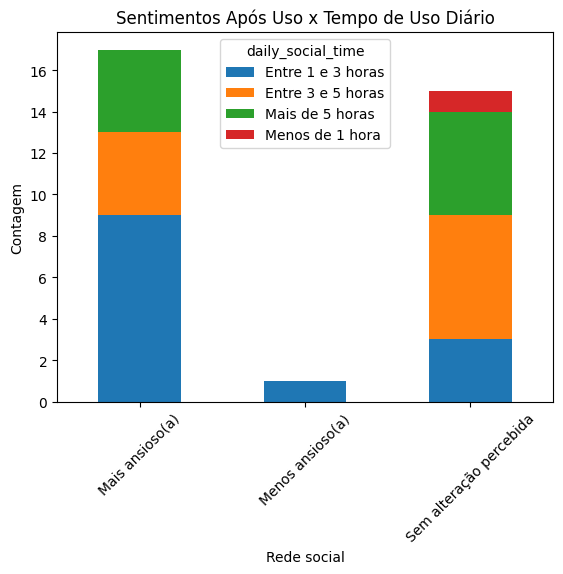

In [ ]:
cross_table_feeling_time.plot(kind='bar', stacked=True)

plt.title('Sentimentos Após Uso x Tempo de Uso Diário')
plt.xlabel('Rede social')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

plt.show()

Análise estatistica quanto à percepção da influência das redes sociais na ansiedade

In [ ]:


influence_mean = forms_df['anxiety_influence'].mean()
influence_median = forms_df['anxiety_influence'].median()
influence_mode = forms_df['anxiety_influence'].mode()[0]
influence_std = forms_df['anxiety_influence'].std()

stats_influence = pd.DataFrame({
    "Média": [influence_mean],
    "Mediana": [influence_median],
    "Moda": [influence_mode],
    "Desvio padrão": [influence_std]
})

stats_influence

,Média,Mediana,Moda,Desvio padrão
0,3.393939,4.0,3,1.434821


{'whiskers': [<matplotlib.lines.Line2D at 0x78e57ed34b10>,
 'caps': [<matplotlib.lines.Line2D at 0x78e57e591a50>,
 'boxes': [<matplotlib.patches.PathPatch at 0x78e57e5933d0>],
 'medians': [<matplotlib.lines.Line2D at 0x78e57eebed50>],
 'fliers': [<matplotlib.lines.Line2D at 0x78e57eebdb10>],
 'means': []}

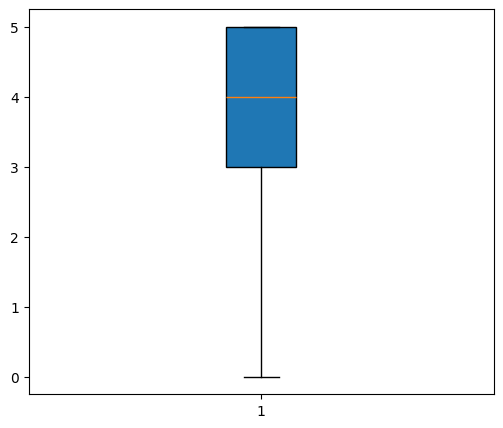

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot(forms_df['anxiety_influence'], vert=True, patch_artist=True)


Análise estatistica sobre a necessidade de uso das redes sociais

In [ ]:
dependency_distrib = forms_df['feels_dependent'].value_counts()
dependency_freq = (dependency_distrib / dependency_distrib.sum()) * 100
cum_percent = dependency_freq.cumsum()

dependency_df_freq = pd.DataFrame({
    'Count': dependency_distrib,
    'Frequency (%)': dependency_freq,
    'Cumulative frequency (%):': cum_percent
})

dependency_df_freq

,Count,Frequency (%),Cumulative frequency (%):
feels_dependent,,,
Às vezes,14,42.424242,42.424242
Frequentemente,13,39.393939,81.818182
Raramente,4,12.121212,93.939394
Sempre,2,6.060606,100.000000


In [ ]:
resp_map = {
    "Nunca": 1,
    "Raramente": 2,
    "Às vezes": 3,
    "Frequentemente": 4,
    "Sempre": 5
}

number_resp = [resp_map[r] for r in forms_df['feels_dependent']]

dependency_df = pd.DataFrame(number_resp, columns=["dependency"])

dependency_mean = dependency_df["dependency"].mean()
dependency_median = dependency_df["dependency"].median()
dependency_mode = dependency_df["dependency"].mode()
dependency_std = dependency_df["dependency"].std()

stats_dependency= pd.DataFrame({
    "Média": dependency_mean,
    "Mediana": dependency_median,
    "Moda": dependency_mode,
    "Desvio padrão": dependency_std
})


stats_dependency

,Média,Mediana,Moda,Desvio padrão
0,3.393939,3.0,3,0.78817


Análise estatistica sobre a tentativa de reducão de tempo de uso

In [ ]:
reduce_distrib = forms_df['thought_about_reducing'].value_counts()
reduce_freq = (reduce_distrib / reduce_distrib.sum()) * 100
cum_percent = reduce_freq.cumsum()

reduce_df_freq = pd.DataFrame({
    'Count': reduce_distrib,
    'Frequency (%)': reduce_freq,
    'Cumulative frequency (%):': cum_percent
})

reduce_df_freq

,Count,Frequency (%),Cumulative frequency (%):
thought_about_reducing,,,
Sim,21,63.636364,63.636364
"Tentei, mas não consegui",9,27.272727,90.909091
Não,3,9.090909,100.000000


In [ ]:
resp_map = {
    "Não": 1,
    "Tentei, mas não consegui": 2,
    "Sim": 3,
}

number_resp = [resp_map[r] for r in forms_df['thought_about_reducing']]

reduce_df = pd.DataFrame(number_resp, columns=["reduce"])

reduce_mean = reduce_df["reduce"].mean()
reduce_median = reduce_df["reduce"].median()
reduce_mode = reduce_df["reduce"].mode()
reduce_std = reduce_df["reduce"].std()

stats_reduce = pd.DataFrame({
    "Média": reduce_mean,
    "Mediana": reduce_median,
    "Moda": reduce_mode,
    "Desvio padrão": reduce_std
})


stats_reduce

,Média,Mediana,Moda,Desvio padrão
0,2.545455,3.0,3,0.665719


In [ ]:
cross_reduce_influence_df = pd.DataFrame({
    "Reducao_Uso": forms_df['thought_about_reducing'],
    "Influencia_Ansiedade": forms_df['anxiety_influence']
})

analysis = cross_reduce_influence_df.groupby("Reducao_Uso")["Influencia_Ansiedade"].agg(["count", "mean", "median", "std"]).rename(columns={
    "count": "Total de Respostas",
    "mean": "Média da Ansiedade",
    "median": "Mediana da Ansiedade",
    "std": "Desvio Padrão"
})

analysis.sort_values("Total de Respostas",ascending=False)



,Total de Respostas,Média da Ansiedade,Mediana da Ansiedade,Desvio Padrão
Reducao_Uso,,,,
Sim,21,3.523810,4.0,1.470342
"Tentei, mas não consegui",9,3.666667,4.0,1.224745
Não,3,1.666667,2.0,0.577350
